# Code train model dự đoán điểm IT001

## Thư viện

In [1]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 

## Đọc và visualise data

In [2]:

train_data_path ='train_qt_score.csv'
data = pd.read_csv(train_data_path)
data.fillna(0, inplace=True)

target = data.QT
train_features = data
train_features.drop(['QT','username'],axis = 1 , inplace = True)


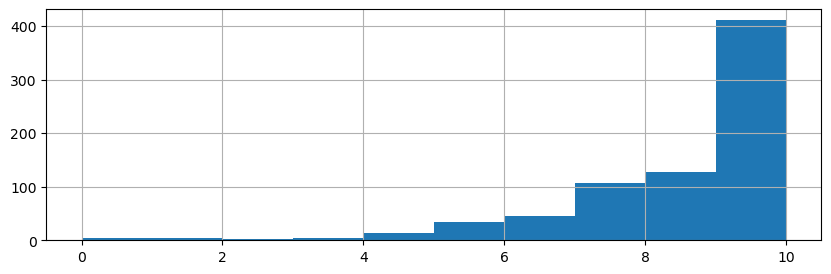

In [3]:
features = target
features.hist(figsize = (10,3))
plt.show()

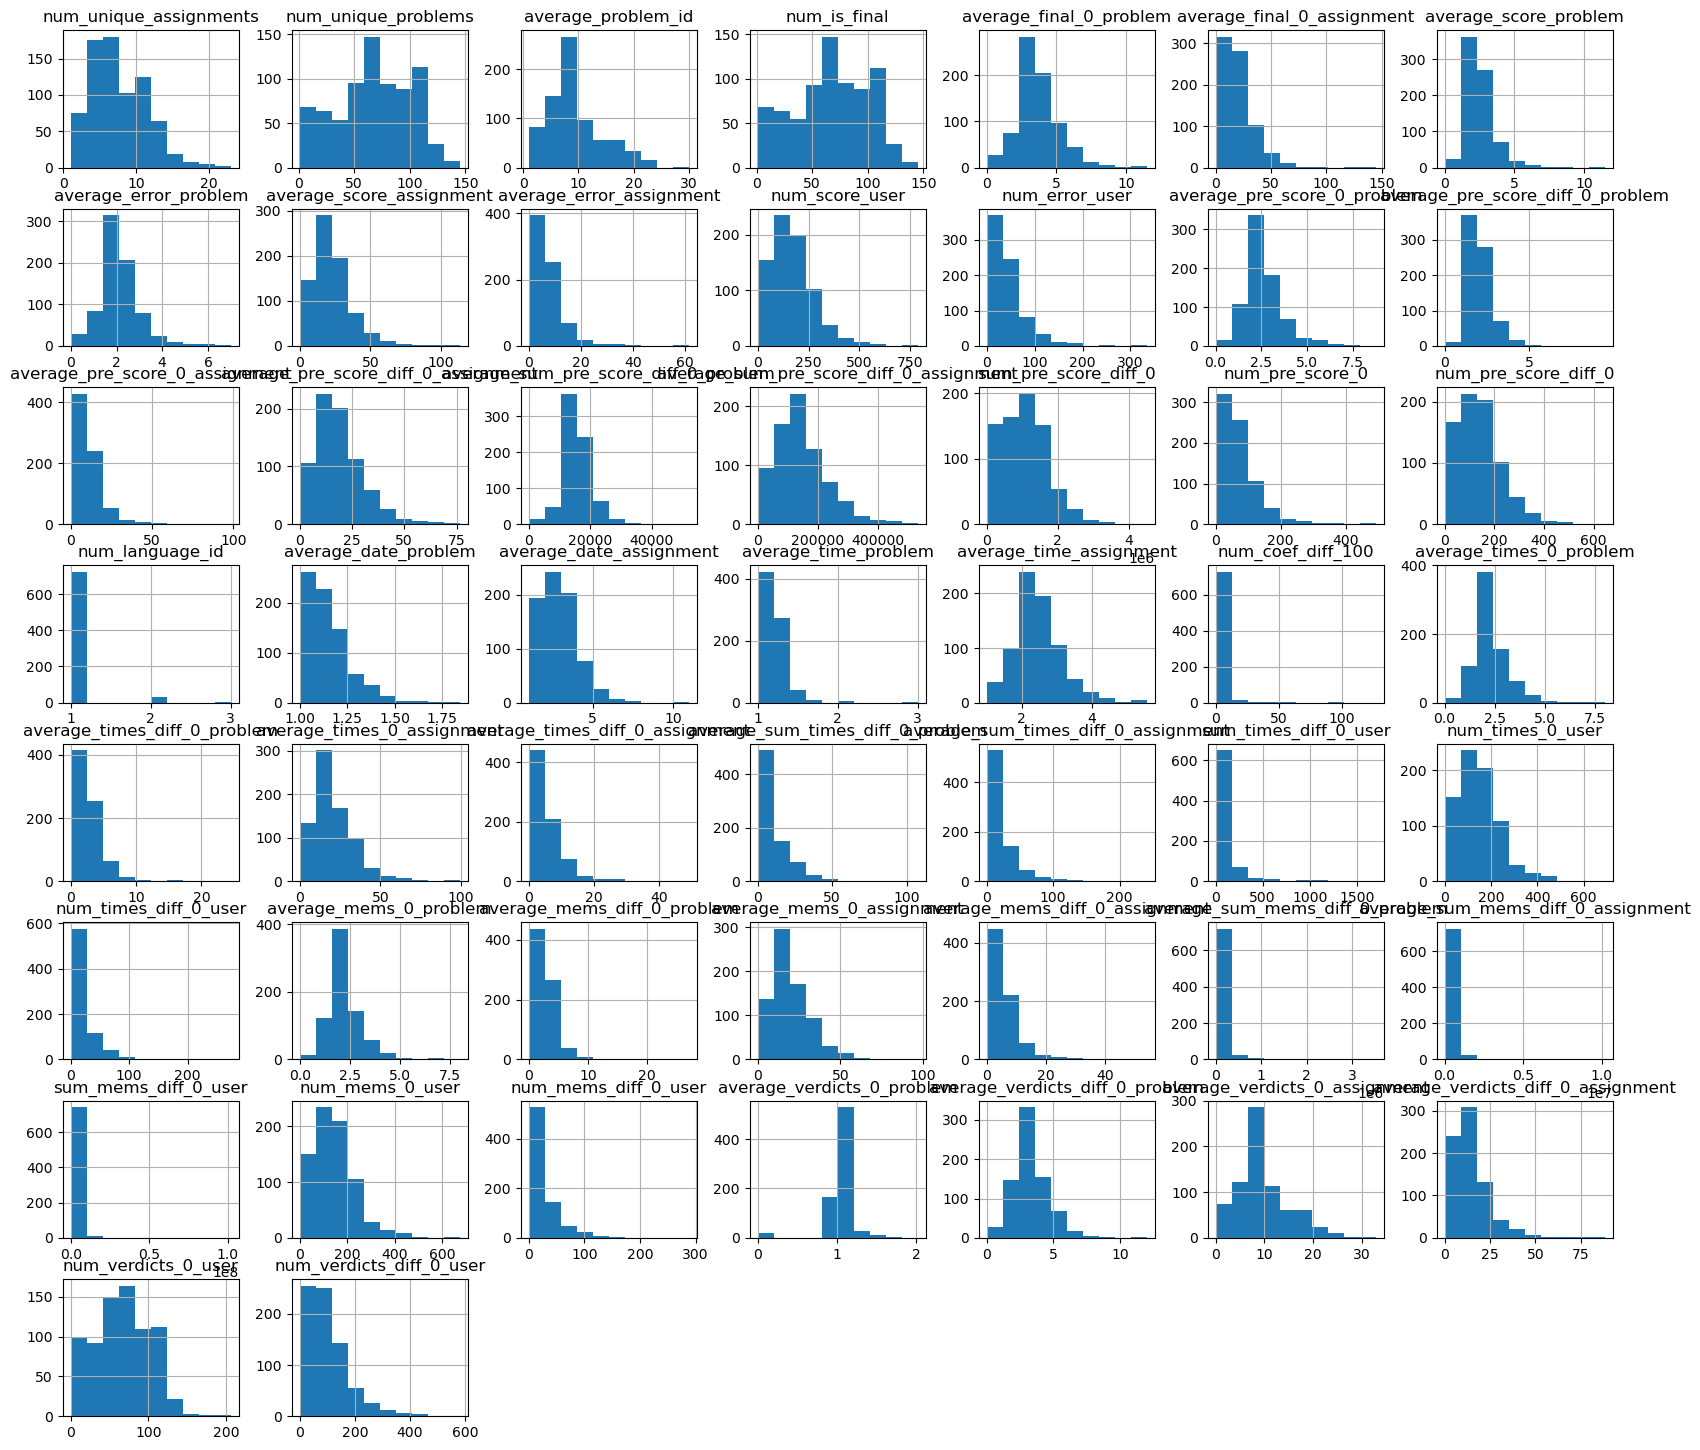

In [4]:
column_names = train_features.columns.tolist()
features = train_features[column_names]
features.hist(figsize = (20,18))
plt.show()

## Split data (test_size = 0.2)

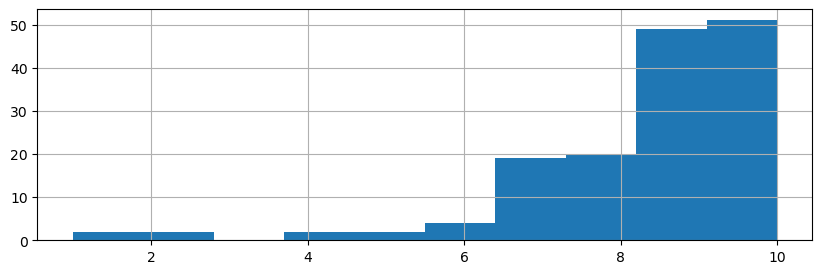

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_features, target, test_size = 0.2)


features = y_test
features.hist(figsize = (10,3))
plt.show()


## Train và đánh giá model

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
#r2_score(y_test, rf.predict(X_test) )
r2_score(y_test, np.round(rf.predict(X_test) * 2) / 2 )

0.036411763609362824

In [85]:

ex = ExtraTreesRegressor().fit(
   X_train, y_train)
#r2_score(y_test, ex.predict(test_scaled))
r2_score(y_test, np.round(ex.predict(X_test) * 2) / 2 )

0.25088378694492275

# Đánh giá trên tập Test và lưu trữ kết quả

In [6]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'username':pd.read_csv('test_qt.csv').username,'QT':prediction})
  my_submission.to_csv('{}'.format(sub_name),index=False,header=False)
  print('A submission file has been made')

In [7]:

test_path ='test_qt.csv'
test = pd.read_csv(test_path)
test.fillna(0, inplace=True)
test.drop( ['username'], inplace=True, axis=1)

In [84]:
predicted = rf.predict(test)
#make_submission(np.round(predicted, 2),'RF_tbtl.csv')
make_submission(np.round(predicted * 2) / 2,'RF_qt.csv')

A submission file has been made


In [86]:
predicted = ex.predict(test)
#make_submission( np.round(predicted, 2) ,'EX_tbtl.csv')
make_submission(np.round(predicted * 2) / 2,'EX_qt.csv')

A submission file has been made
